In [41]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import math

# Dataset Creation

In [42]:
c1 = [2,3]
c2 = [13,15]
no = 50
np.random.seed(30)
Class1 = np.matlib.repmat(c1, no,1) + np.random.randn(no,len(c1))
np.random.seed(35)
Class2 = np.matlib.repmat(c2, no,1) + np.random.randn(no,len(c2))
Data = np.append(Class1,Class2,axis = 0)
Trainlabel  = np.append(np.zeros((no,1)),np.ones((no,1)),axis = 0)

# Plot the Data

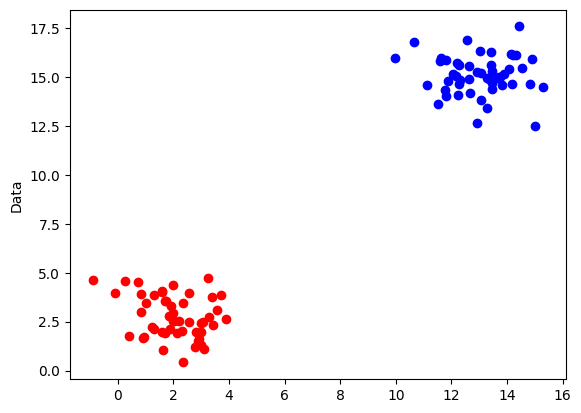

In [43]:
import matplotlib.pyplot as plt
plt.plot(Class1[:,0],Class1[:,1],'ro')
plt.plot(Class2[:,0],Class2[:,1],'bo')
plt.ylabel('Data')
plt.show()

# Variable (for consistency with the class notation)

In [44]:
m = Data.shape[0]
X = Data.T
y = Trainlabel.T

# Initialziation

In [55]:
n_i = 2
n_h = 8
n_l = 1
learningrate = 0.005
numiter = 1000
l = [n_i,n_h,n_l]
W1 = np.random.randn(n_h,n_i)*0.01
b1 = np.random.randn(n_h,1)*0.01
W2 = np.random.randn(n_l,n_h)*0.01
b2 = np.random.randn(n_l,1)*0.01
print(X.shape)

(2, 100)


In [56]:
def sigmoid(x,play):
    z = 1/(1+np.exp(-x))
    if (play == "forward"):
        return z
    elif (play =="backward"):
        return z*(1-z)

In [57]:
def relu(x, play):
    if play == "forward":
        return np.maximum(0, x)
    elif play == "backward":
        x[x<=0] = 0
        x[x>0] = 1
        return x

In [58]:
for i in range(numiter):
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1, play="forward")  # Changed from sigmoid to relu
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2, play="forward")  # Keep sigmoid for the output layer

    L = (1.0/m) * -np.sum(np.multiply(y,np.log(A2)) + np.multiply(1-y,np.log(1-A2)))

    dZ2 = A2 - y
    dW2 = (1.0/m) * np.dot(dZ2, A1.T)
    db2 = (1.0/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1, play="backward"))
    dW1 = (1.0/m) * np.dot(dZ1, X.T)
    db1 = (1.0/m) * np.sum(dZ1, axis=1, keepdims=True)
    W1 = W1 - learningrate * dW1
    b1 = b1 - learningrate * db1
    W2 = W2 - learningrate * dW2
    b2 = b2 - learningrate * db2
    print("Loss for ", i, "th iteration =>", L)

Loss for  0 th iteration => 0.6917715954291326
Loss for  1 th iteration => 0.691741524833487
Loss for  2 th iteration => 0.6917109100427912
Loss for  3 th iteration => 0.6916797149194731
Loss for  4 th iteration => 0.691647926110255
Loss for  5 th iteration => 0.6916155285883397
Loss for  6 th iteration => 0.6915825084180476
Loss for  7 th iteration => 0.6915488544583788
Loss for  8 th iteration => 0.6915145536122578
Loss for  9 th iteration => 0.6914795902607911
Loss for  10 th iteration => 0.6914439538743662
Loss for  11 th iteration => 0.6914076323524695
Loss for  12 th iteration => 0.6913706118285187
Loss for  13 th iteration => 0.6913328761862585
Loss for  14 th iteration => 0.6912944217280008
Loss for  15 th iteration => 0.6912552699062599
Loss for  16 th iteration => 0.6912153633799567
Loss for  17 th iteration => 0.6911746910753526
Loss for  18 th iteration => 0.6911332378009641
Loss for  19 th iteration => 0.691090990001829
Loss for  20 th iteration => 0.6910479239836134
Loss 

# Prediction

In [59]:
def prediction(X, W1, b1, W2, b2):
    Z1pred = np.dot(W1, X) + b1
    A1pred = relu(Z1pred, play="forward")  # Changed from sigmoid to relu
    Z2pred = np.dot(W2, A1pred) + b2
    A2pred = sigmoid(Z2pred, play="forward")  # Keep sigmoid for the output layer
    prediction = []

    for i in range(A2pred.shape[1]):
        if (A2pred[0][i] > 0.5):  # Common threshold for binary classification
            prediction.append(1)
        elif (A2pred[0][i] <= 0.5):
            prediction.append(0)
    N = len(prediction)
    prediction = np.array(prediction)
    prediction = prediction.reshape(1, N)

    return prediction

# Prediciton Train data

In [60]:
predictionTrain = prediction(X,W1,b1,W2,b2)

print("prediction label for traindata:",predictionTrain)
print("True label for train data:", y)

prediction label for traindata: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
True label for train data: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]


## Testdata creation

In [52]:
Tc1 = [3,4]
Tc2 = [14,16]
np.random.seed(50)
TClass1 = np.matlib.repmat(Tc1, no,1) + np.random.randn(no,len(c1))
np.random.seed(55)
TClass2 = np.matlib.repmat(Tc2, no,1) + np.random.randn(no,len(c2))
TData = np.append(TClass1,TClass2,axis = 0)
Testlabel  = np.append(np.zeros((no,1)),np.ones((no,1)),axis = 0)
X2 = TData.T
y2 = Testlabel.T

# Plotting Testdata

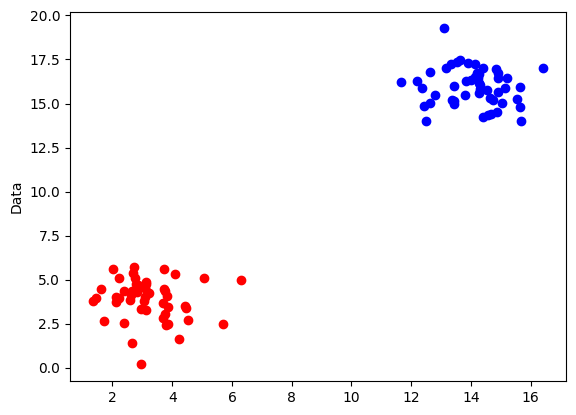

In [53]:
import matplotlib.pyplot as plt
plt.plot(TClass1[:,0],TClass1[:,1],'ro')
plt.plot(TClass2[:,0],TClass2[:,1],'bo')

plt.ylabel('Data')
plt.show()

In [54]:
predictionTest = prediction(X2,W1,b1,W2,b2)
print("prediction label for testndata:",predictionTest)
print("True label for test data:",y2)

prediction label for testndata: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
True label for test data: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]
